In [2]:
# reading the IRIS.csv data into flowers using pandas
import pandas as pd
flowers = pd.read_csv("IRIS.csv")
flowers.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
species_name = flowers.species.unique()
species_name

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
def classify(s_name):
    if s_name == "Iris-setosa":
        return 0
    elif s_name == "Iris-versicolor":
        return 1
    elif s_name == "Iris-virginica":
        return 2
s_label = [classify(i) for i in flowers.species]

In [5]:
flowers["label"] = s_label
flowers

,sepal_length,sepal_width,petal_length,petal_width,species,label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [25]:
y = flowers.label
X = flowers[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler
# train size.
size = np.arange(0.05, 1, 0.05)

xgb_model = XGBClassifier(eval_metric=["mlogloss"])

loss_train = []
loss_test = []
sc = StandardScaler()
for i in size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = i, test_size = 1 - i, random_state = 0)
    # X_train = sc.fit(X_train).transform(X_train)
    # X_test = sc.fit(X_test).transform(X_test)
    evaluation_set = [(X_train, y_train), (X_test, y_test)]
    xgb_model.fit(X_train, y_train, eval_set=evaluation_set, verbose = False)
    eval_res = xgb_model.evals_result()
    loss_train.append(eval_res["validation_0"]["mlogloss"][len(eval_res["validation_0"]["mlogloss"]) - 1])
    loss_test.append(eval_res["validation_1"]["mlogloss"][len(eval_res["validation_1"]["mlogloss"]) - 1])
print("train loss", loss_train)
print("test loss", loss_test)

train loss [0.4185228454215186, 0.10976904407143592, 0.07312864031304013, 0.05182859990745783, 0.04356056341045612, 0.03558132503595617, 0.03359442480051747, 0.02815518678786854, 0.02617058962055329, 0.02177352458859484, 0.02074384768266322, 0.01900417854388555, 0.01740938526237403, 0.0163025126249219, 0.01547629796966378, 0.01782644679866886, 0.01655330924467572, 0.01562124606118434, 0.01443924102358336]
test loss [0.8156153338251414, 0.27353143625789217, 0.3281434075179277, 0.34307945976033805, 0.14366461181666998, 0.16124298723769329, 0.15049920480090137, 0.1539936374976403, 0.1594244325365198, 0.16042728989074628, 0.19956973903155065, 0.21400329591706396, 0.13160230579153406, 0.14008886218847086, 0.15748841725412363, 0.01725563924216355, 0.04935371230417133, 0.02987517204601318, 0.0041636476671556]


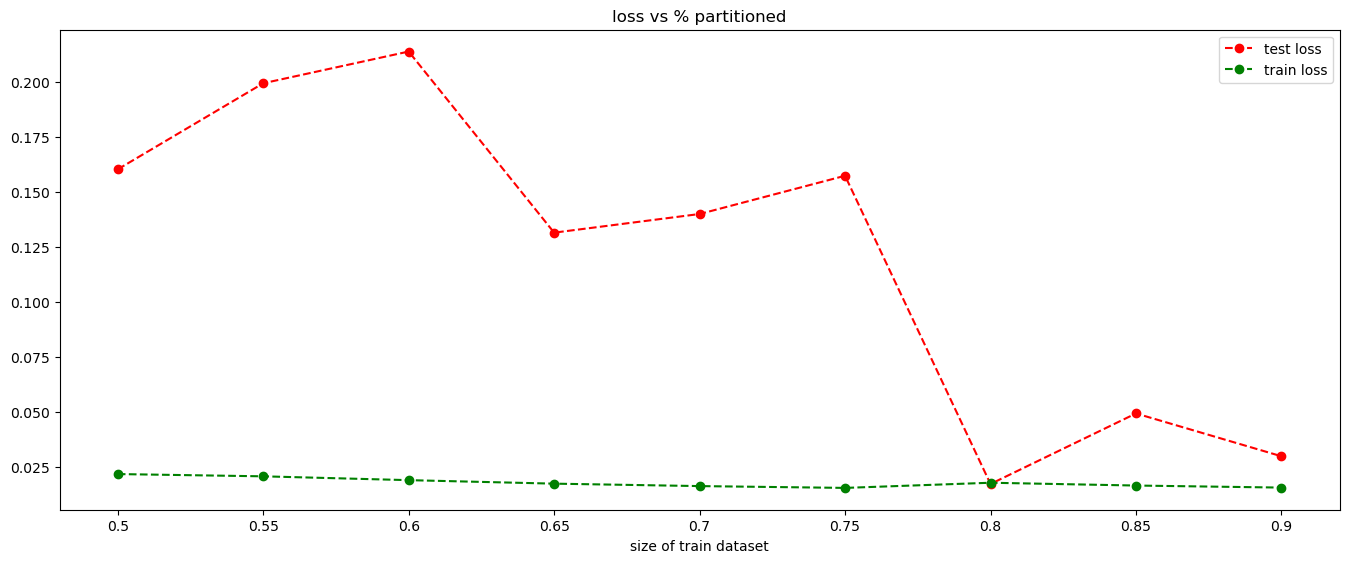

In [26]:
import matplotlib.pyplot as plt

size_tick = np.arange(0, 19, 1)

size = [round(x, 2) for x in size]
plt.axes([0,0,2,1])
plt.plot(size_tick[9:18], loss_test[9:18], marker='o', linestyle='--', color='r', label='test loss')
plt.plot(size_tick[9:18], loss_train[9:18], marker='o', linestyle='--', color='g', label='train loss')
plt.xlabel('size of train dataset') 
plt.xticks(size_tick[9:18], size[9:18])
plt.title('loss vs % partitioned')
plt.legend() 
plt.show()